# 14 Nov - Python Libraries


![python gif](https://media.giphy.com/media/KAq5w47R9rmTuvWOWa/giphy.gif)

## Pre Requisites

None for today!

---

## Class Curriculum

| Section content                             | Expected time (mins) | Pre - Requirements |
| ------------------------------------------- | -------------------- | ------------------ |
| text   | 5 minutes            | ❌                 |
| Lesson Goals                                | 5 minutes            | ❌                 |

## using libraries

"A library is a collection of materials, books or media that are accessible for use. A library provides physical (hard copies) or digital access (soft copies) materials, and may be a physical location or a virtual space, or both." - *Wikipedia*

Python libraries provide various functions and classes for all kinds of uses. They consist of well tested code that proofed useful in many projects. In the end it's just code that you do not need to write yourself, which you can use to make your life as a programmer a little bit easier.

## some libraries and usage examples

There are quite a lot of Python libraries available and we can show only a few examples that we will use later in this course.

### NumPy

NumPy is an open source project aiming to enable numerical computing with Python. [https://numpy.org](https://numpy.org)

#### working with arrays

NumPy supports a variety of use cases when working with numeric or tabular data, which come most handy in data processing or datascience. You can use the following website as a reference:
[https://numpy.org/devdocs/user/quickstart.html](https://numpy.org/devdocs/user/quickstart.html)



In [ ]:
import numpy as np

# create a two dimensional array with some numbers
dim2array = np.array([
    [10, 11, 12, 13, 14, 15],
    [20, 21, 22, 23, 24, 25], 
    [30, 31, 32, 33, 34, 35],
    [40, 41, 42, 43, 44, 45]
])

# to see the size of the array dimensions (4 rows with 6 elements each in this case)
print(dim2array.shape)

# element wise operations
print("add '3' to each element: {}".format(
    (dim2array[0]+3))
)

# you can transform the shape of arrays by providing the new dimensions
dim1array = dim2array.reshape(24)
print("one dimensional: {}".format(dim1array))
print("add all elements: {}".format(dim1array.sum()))


(4, 6)
add '3' to each element: [13 14 15 16 17 18]
one dimensional: [10 11 12 13 14 15 20 21 22 23 24 25 30 31 32 33 34 35 40 41 42 43 44 45]
add all elements: 660


#### loading and storing data to files

In real life situations you will not be able to write every data into your source code file. NumPy hase some convenience functions to load and store array data as text files. [https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html)

when reading Data from File, you need to specify a format:

    c : character
    d or i : signed decimal integer
    f : decimal floating point
    s : string of characters
    u : unsigned decimal integer

In [2]:
import numpy as np
from io import StringIO

names = np.array([['Python',29.48],['Java',17.18],['JavaScript',9.14],['C#',6.94],['PHP',6.49],['C/C++',6.49],['R',3.59],['TypeScript',2.18],['Swift',2.1],['Objective-C',2.06]])
np.savetxt('programming-languages.txt', names, delimiter=';', fmt=("%s"))

# load data from CSV file:  
f = open('programming-languages.txt','r')

# alternatively you could provide Data as String
#f = StringIO("Python;29.48\nJava;17.18\nJavaScript;9.14\nC#;6.94\nPHP;6.49\nC/C++;6.49\nR;3.59\nTypeScript;2.18\nSwift;2.1\nObjective-C;2.06")

language, percentage =  np.loadtxt(f, dtype={'names': ('language', 'percentage'), 'formats': ('U15', 'f4')}, delimiter=';', comments='§', unpack=True)
print(language)

['Python' 'Java' 'JavaScript' 'C#' 'PHP' 'C/C++' 'R' 'TypeScript' 'Swift'
 'Objective-C']


### Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. [https://matplotlib.org/](https://matplotlib.org/)

Matplot supports a number of visualizations for common data structures out of the box, for example:

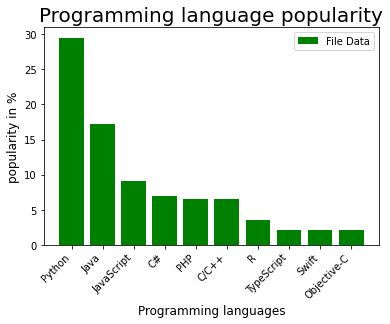

In [ ]:
import matplotlib.pyplot as plt

# drawing a bar diagram
plt.bar(language, percentage, color = 'g', label = 'File Data')
  
plt.xlabel('Programming languages', fontsize = 12)
plt.ylabel('popularity in %', fontsize = 12)

  
plt.title('Programming language popularity', fontsize = 20)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

displaying pie chart of ['Python' 'Java' 'JavaScript' 'C#' 'PHP']


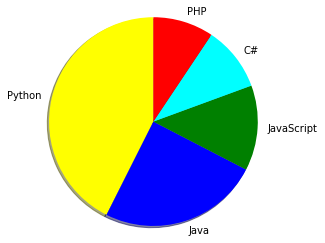

In [ ]:
colors = ['yellow', 'b', 'green', 'cyan','red'] 
top5Percent = np.split(percentage,2)[0]
top5language = np.split(language,2)[0]
print("displaying pie chart of {}".format(top5language))

# plotting pie chart 
plt.pie(top5Percent, labels = top5language, colors = colors, startangle = 90,
        shadow = True, radius = 1.2) 
plt.show()

### pandas

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. [https://pandas.pydata.org/](https://pandas.pydata.org/)

#### loading and storing CSV data from/to files

In [31]:
import pandas as pd

import matplotlib.pyplot as plt

programmingLanguages = pd.read_csv("programming-languages.txt", sep=';', header=None)
programmingLanguages.head(5)
programmingLanguages.head(5).to_csv("programming-languages.csv", header=["language","percent"])

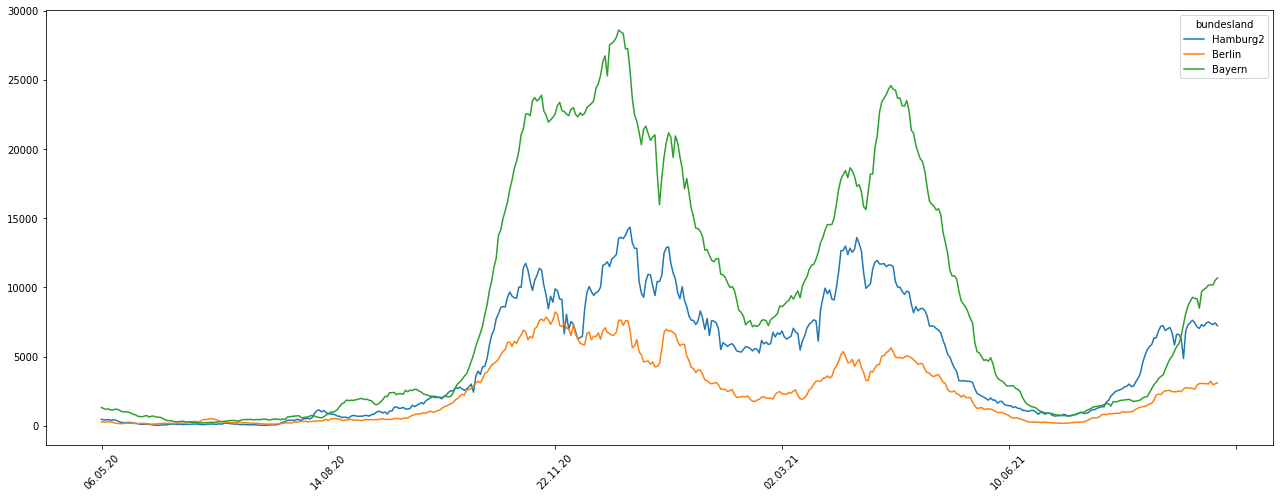

In [105]:

programmingLanguages = pd.read_csv("fallzahlen.txt", sep='\t', parse_dates=[0], index_col=0).transpose()
programmingLanguages.head(5)
programmingLanguages = programmingLanguages.apply(pd.to_numeric, errors='ignore')
programmingLanguages
#programmingLanguages.info()
programmingLanguages["Hamburg2"]=programmingLanguages["Hamburg"]*5
programmingLanguages[["Hamburg2","Berlin","Bayern"]].plot(rot=45, figsize=(22, 8))

#plot.show()

### seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. [https://seaborn.pydata.org/](https://seaborn.pydata.org/)